# Вариант 17. 4_2

Особь – битовая последовательность размера n (кол-во грузов)
Кол-во особей всегда = 200

Начальная популяция: 1.1 случайная генерация

Отбор: 2.2 выбрать только 20% самых приспособленных особей

Скрещивание: 3.2 однородный (каждый бит от случайно выбранного родителя)

Мутация: 4.2 случайное изменение 3х битов у 5% особей

Новая популяция: 5.2 «штраф» за «старость» - 10% функции приспособленности, выбор лучших

Оценка результата: Наступила сходимость (функция приспособленности лучшей особи в популяциях отличается не более, чем на стоимость самой дешевой вещи) или прошло 500 поколений

Вытаскиваем нужные данные из файла

In [1]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
from prettytable import PrettyTable

myList=[]
with open('17.txt') as f:
    for line in f:
        myList.append([float(x) for x in line.split()])
lngth=len(myList)

maxWeight=myList[0][0]
maxSize=myList[0][1]

value=[]
size=[]
weight=[]

for i in range (1,lngth):
    #ценность
    value.append(myList[i][2])
    #размер
    size.append(myList[i][1])
    #вес
    weight.append(myList[i][0])
item_list = np.zeros((len(weight),3))

print(myList,'\n')
print(value)

[[13000.0, 12.0], [853.0, 0.8, 145.0], [945.0, 0.8, 236.0], [602.0, 1.1, 374.0], [1571.0, 0.7, 115.0], [1446.0, 0.5, 297.0], [1015.0, 0.4, 124.0], [154.0, 0.7, 308.0], [1688.0, 0.4, 214.0], [133.0, 0.5, 234.0], [856.0, 0.6, 238.0], [864.0, 0.4, 244.0], [1474.0, 0.7, 321.0], [1078.0, 0.9, 127.0], [174.0, 0.9, 297.0], [1045.0, 0.6, 211.0], [740.0, 1.0, 317.0], [950.0, 1.0, 212.0], [145.0, 0.9, 161.0], [1192.0, 1.2, 289.0], [1192.0, 1.0, 120.0], [1240.0, 1.1, 213.0], [579.0, 0.4, 229.0], [1278.0, 0.5, 351.0], [1112.0, 1.1, 173.0], [579.0, 0.6, 121.0], [1149.0, 1.2, 384.0], [776.0, 0.9, 143.0], [214.0, 0.6, 221.0], [893.0, 0.9, 280.0], [698.0, 1.2, 350.0]] 

[145.0, 236.0, 374.0, 115.0, 297.0, 124.0, 308.0, 214.0, 234.0, 238.0, 244.0, 321.0, 127.0, 297.0, 211.0, 317.0, 212.0, 161.0, 289.0, 120.0, 213.0, 229.0, 351.0, 173.0, 121.0, 384.0, 143.0, 221.0, 280.0, 350.0]


In [2]:
numGenes = len(myList)-1
numInd=200

Функции для проверки ограничений

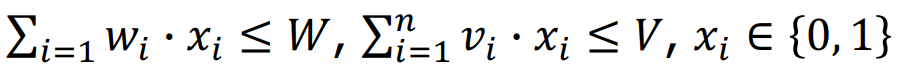

In [3]:
def weight_checking(individual):
    sumWeight=0
    for i in range(numGenes):
        sumWeight += individual[i] * weight[i]
    if sumWeight > maxWeight:
        return 0
    else: 
        return sumWeight

def size_checking(individual):
    sumSize=0
    for i in range(numGenes):
        sumSize += individual[i] * size[i]
    if sumSize > maxSize:
        return 0
    else: 
        return sumSize   


Начальная популяция: 1.1 случайная генерация

In [4]:
def creation_of_individual():
    individual = [rd.randint(0, 1) for x in range(numGenes)]
    while not (size_checking(individual) and weight_checking(individual)):
        individual = [rd.randint(0, 1) for x in range(numGenes)]
    return individual


def creation_of_population():
    initial_population=[]
    for x in range(numInd):
        initial_population.append(creation_of_individual())
    return initial_population

Поиск ценности каждой особи

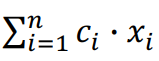

In [5]:
def sum_of_value(individual):
    sumValue=0
    for i in range(numGenes):
        sumValue+=individual[i]*value[i]
    return sumValue

Отбор: 2.2 выбрать только 20% самых приспособленных особей

Те, у кого ценность выше

Скрещивание: 3.2 однородный (каждый бит от случайно выбранного родителя)

In [6]:
def crossingover(chosen):
    population_of_children = []
    lngth = len(chosen) - 1
    
    for i in range(lngth,0,-1):
        child = []
        individual = creation_of_individual()
        
        first_parent_index = rd.randint(0, i)
        i = i-1
        second_parent_index = rd.randint(0, i)

        first_parent = chosen[first_parent_index]        
        second_parent = chosen[second_parent_index]

        for i in range(len(individual)):
            if individual[i] == 0:
                child.append(first_parent[i])
            else:
                child.append(second_parent[i])

        population_of_children.append(child)
                
    return population_of_children


Мутация: 4.2 случайное изменение 3х битов у 5% особей

In [7]:
def mutation(individual):
    gene = [randint(0, 1)]
    numb = []
    for x in range(0,3):
            numb.append(np.random.randint(0,len(individual) - 1))
    for i in numb:
        individual[i] = 0 if individual[i] !=0 else 1
    return individual

Новая популяция: 5.2 «штраф» за «старость» - 10% функции приспособленности, выбор лучших

Здесь нам нужно посчитать ценность старых особей и отнять 10%

Дальше посчитаем общую ценность и выберем лучших

In [8]:
def new_population_making(initial_population, min_cost):
    
    population=initial_population

    #сортируем популяцию по убыванию ценности каждой особи
    population.sort(key=lambda x: sum_of_value(x), reverse=True)

    for generation in range(0,500):
        # скрещиваем 20% лучших особей
        new_population = []
        for i in range (0, round(len(population) * 0.2)):
            new_population.append(population[i])
        population_of_children = crossingover(new_population)
        # мутация у 5% особей
        for i in range(0, round(len(population) * 0.05)):
            mutation_indx = rd.randint(0, len(population) - 1)
            population[mutation_indx] = mutation(population[mutation_indx])
        # урезаем ценность особей на 10%
        for individual in population:
            individual.append(sum_of_value(individual) * 0.9)
        # мутация у 5% особей после скрещивания
        for i in range(0, round(len(population_of_children) * 0.05)):
            mutation_indx = rd.randint(0, len(population_of_children) - 1)
            population_of_children[mutation_indx] = mutation(population_of_children[mutation_indx])
        # не трогаем ценность "новых" особей
        for individual in population_of_children:
            individual.append(sum_of_value(individual))
        # к "старым" добавляем "новых", чтобы дальше из них выбрать лучших
        population.extend(population_of_children)
        # нужно, чтобы записи удовлетворяли ограничениям
        population = list(filter(lambda x: weight_checking(x) and size_checking(x), population))
        # опять сортируем по ценности, но уже всю новую популяцию
        population.sort(key=lambda x: sum_of_value(x), reverse=True)
        # Новая популяция из лучших особей(по условию 200)
        population=population[0:200]       
        theBest = population[0]

    return theBest

initial_population = creation_of_population()
rez = new_population_making(initial_population, min(value))
my_file = open('hw4_2.txt','w')
initial_population = creation_of_population()
rez = new_population_making(initial_population, min(value))

sum1,sum2 = 0,0
table = PrettyTable()
for i in range(numGenes):
    sum1 += rez[i] * size[i]
    sum2 += rez[i] * weight[i]
    if rez[i] == 1:
        th_data = [i, weight[i], size[i],value[i]]
        table.add_row(th_data)
        my_file.write(str(th_data) + "\n")
        print(th_data)
result="\nГрузоподъемность:"+ str(round(sum2,2)) + " при том, что максимально:" + str(maxWeight) + "\nВместимость:"+ str(round(sum1,2)) + " при том, что максимально:" + str(maxSize) + "\nСуммарная ценность:" + str(sum_of_value(rez))
my_file.write(result)
print(result)
my_file.close()
  

[2, 602.0, 1.1, 374.0]
[4, 1446.0, 0.5, 297.0]
[6, 154.0, 0.7, 308.0]
[7, 1688.0, 0.4, 214.0]
[8, 133.0, 0.5, 234.0]
[10, 864.0, 0.4, 244.0]
[11, 1474.0, 0.7, 321.0]
[13, 174.0, 0.9, 297.0]
[15, 740.0, 1.0, 317.0]
[18, 1192.0, 1.2, 289.0]
[21, 579.0, 0.4, 229.0]
[22, 1278.0, 0.5, 351.0]
[24, 579.0, 0.6, 121.0]
[25, 1149.0, 1.2, 384.0]
[27, 214.0, 0.6, 221.0]
[29, 698.0, 1.2, 350.0]

Грузоподъемность:12964.0 при том, что максимально:13000.0
Вместимость:11.9 при том, что максимально:12.0
Суммарная ценность:4551.0
